In [2]:
import pandas as pd
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.metrics.pairwise import cosine_similarity

In [13]:
# pip install tensorflow-macos tensorflow-metal
# pip install --upgrade pip tensorflow

# import tensorflow as tf
# print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

In [8]:
df = pd.read_csv("./data/tfidf_df.csv")

le = LabelEncoder()
df['장소명_encoded'] = le.fit_transform(df['장소명'])

# TF-IDF 벡터화
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df['정보'])

# ------

num_classes = df['장소명_encoded'].nunique() 
vocab_size = len(tfidf.vocabulary_)
max_length = tfidf_matrix.shape[1]

In [3]:
svd = TruncatedSVD(n_components=100)  # 100차원으로 축소
reduced_tfidf_matrix = svd.fit_transform(tfidf_matrix)

# 모델 정의
model = keras.Sequential()
model.add(keras.layers.InputLayer(input_shape=(reduced_tfidf_matrix.shape[1],)))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(num_classes, activation='softmax'))

# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# from sklearn.model_selection import train_test_split
# trd, vad, trt, vdt = train_test_split(reduced_tfidf_matrix, df['장소명_encoded'], test_size=0.2)

# checkpoint_cb = keras.callbacks.ModelCheckpoint("./Data/best-simpleRnn-model.keras")
# early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

# 모델 학습
# history = model.fit(reduced_tfidf_matrix, df['장소명_encoded'], epochs=50, batch_size=70)

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
2024-07-01 17:22:02.639947: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-07-01 17:22:02.639974: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-07-01 17:22:02.639987: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-07-01 17:22:02.640233: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-07-01 17:22:02.640254: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


---------

In [3]:
# 모델 정의
model = keras.Sequential()
model.add(keras.layers.InputLayer(input_shape=(tfidf_matrix.shape[1],)))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(num_classes, activation='softmax'))

# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
2024-07-01 17:38:54.316637: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-07-01 17:38:54.316671: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-07-01 17:38:54.316683: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-07-01 17:38:54.316964: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-07-01 17:38:54.316985: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
# 모델 학습
history = model.fit(tfidf_matrix, df['장소명_encoded'], epochs=50, batch_size=70)

Epoch 1/50


Text(0, 0.5, 'loss')

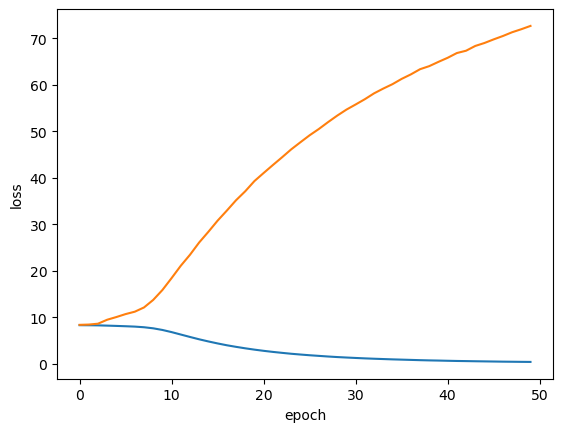

In [ ]:
import matplotlib.pyplot as plt
# 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.xlabel('epoch')
plt.ylabel('loss')

In [ ]:
from konlpy.tag import Komoran
import re
ko = Komoran()

query = "수원 왕 갈비집"
query = ' '.join(ko.nouns(query))
query_tfidf = tfidf.transform([query])

import numpy as np
output_index = np.argsort(model.predict(svd.transform(query_tfidf))[0])[::-1][:10]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [ ]:
search_index = []
for j in output_index :
    search_index.append(df.loc[df.장소명_encoded == j, :].index[0])

df.loc[search_index,]

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         6,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4040)           │       133,320 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 141,864 (554.16 KB)

 Trainable params: 141,864 (554.16 KB)

 Non-trainable params: 0 (0.00 B)

---

In [ ]:
df = pd.read_csv("./data/tfidf_df.csv")

le = LabelEncoder()
df['장소명_encoded'] = le.fit_transform(df['장소명'])

# TF-IDF 벡터화
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df['정보'])

# ------

num_classes = df['장소명_encoded'].nunique() 
vocab_size = len(tfidf.vocabulary_)
max_length = tfidf_matrix.shape[1]

In [ ]:
# 모델 정의
model = keras.Sequential()
model.add(keras.layers.InputLayer(input_shape=(tfidf_matrix.shape[1],)))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(num_classes, activation='softmax'))

# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

from sklearn.model_selection import train_test_split
trd, vad, trt, vdt = train_test_split(tfidf_matrix, df['장소명_encoded'], test_size=0.2)

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
2024-07-01 16:33:22.064618: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-07-01 16:33:22.064646: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-07-01 16:33:22.064656: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-07-01 16:33:22.064704: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-07-01 16:33:22.064743: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [ ]:
history = model.fit(trd, trt, epochs=50, batch_size=70, validation_data=[vad,vdt])

Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.0000e+00 - loss: 8.3068 - val_accuracy: 0.0000e+00 - val_loss: 8.3252
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0015 - loss: 8.2962 - val_accuracy: 0.0000e+00 - val_loss: 8.3729
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0183 - loss: 8.2617 - val_accuracy: 0.0000e+00 - val_loss: 8.5918
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 5.8579e-04 - loss: 8.1169 - val_accuracy: 0.0000e+00 - val_loss: 9.4834
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 8.6136e-04 - loss: 7.8132 - val_accuracy: 0.0000e+00 - val_loss: 10.6446
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.0033 - loss: 7.3961 - val_accuracy: 0.0000e+00 - val_loss: 12.3357
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.0079 - loss: 6.8823 - val_accuracy: 0.0000e+00 - val_loss: 14.3499
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.037

KeyboardInterrupt: 

In [3]:
# from tensorflow import keras
loaded_model = keras.models.load_model('lstm.keras')

2024-07-01 17:57:53.479018: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-07-01 17:57:53.479045: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-07-01 17:57:53.479056: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-07-01 17:57:53.479254: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-07-01 17:57:53.479274: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/opt/anaconda3/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 14 variables whereas the saved 

In [4]:
import pickle
# 저장된 모델 불러오기
with open('./tfidf_vectorizer.pkl', 'rb') as f:
    tfidf = pickle.load(f)

In [6]:
loaded_model.steps_per_execution = 1

In [15]:
from konlpy.tag import Komoran
import re
ko = Komoran()

query = "종로 근처 호텔 추천해줘"
query = ' '.join(ko.nouns(query))
query_tfidf = tfidf.transform([query])

import numpy as np
output_index = np.argsort(loaded_model.predict(query_tfidf)[0])[::-1][:10]

search_index = []
for j in output_index :
    search_index.append(df.loc[df.장소명_encoded == j, :].index[0])

df.loc[search_index,]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


,장소명,정보,장소명_encoded
2315,4월호텔,4월호텔 사월 호텔 역삼역 근처 위치 호텔 특유 감성 분위기 유발 고급 인테리어 특...,16
2187,메이플레이스 호텔 서울 동대문,메이플레이스 호텔 서울 동대문 메이 필드 호텔 자연 고객 환대 정신 감성 호텔 경영...,1255
2112,호텔 이채,호텔 이채 서울 신촌 위치 이채 기본 충실 모텔 생각 인테리어 객실 테마 신촌 젊음...,3915
3721,갓잇(god eat),갓잇(god eat) 잇 서울 송파구 리단 길 위치 멕시칸 음식 전문점 이다 도심 ...,191
412,스페이스 모다[한국관광 품질인증/Korea Quality],스페이스 모다[한국관광 품질인증/Korea Quality] 스페이스 서울 성북구 낙...,2235
3727,익선동 그집,익선동 그집 익선동 한옥 모델링 해 전통 한국 미 칼국수 손 만두 전문 음식점 이다...,2960
3322,스타필드 코엑스몰,스타필드 코엑스몰 트렌드 문화 흐름 도시 매력 스타 필드 코엑스몰 서울 중심 삶 이...,2219
2937,안테룸서울,안테룸서울 테 서울 강남 위치 호텔 복합 시설 호텔 테 교토 서울 테 서울 오픈 테...,2416
3389,더 플라자 (THE PLAZA),플라자 (THE PLAZA) 플라자 호텔 국내 최고 이다 호텔 곳곳 감성 디자인 미...,848
4032,롯데백화점 김포공항점,롯데백화점 김포공항점 경험 제공 롯데백화점 김포공항 김포공항역 연결 롯데마트 롯데시...,1104


In [ ]:
loaded_model.predict()